In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.axes as ax

In [3]:
data = pd.read_csv('one.csv')

In [4]:
data = data.dropna()  #Dropping the missing values

In [5]:
print(data.shape)
data.head(700)

(699, 2)


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [6]:
train_input= np.array(data.x[0:500]).reshape(500,1)
train_output= np.array(data.y[0:500]).reshape(500,1)
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 12811.482389874685
Iteration = 1, Loss = 1550.8028428468322
Iteration = 1, Loss = 193.7684110799971
Iteration = 1, Loss = 30.23099374568915
Iteration = 2, Loss = 10.522955077677697
Iteration = 3, Loss = 8.14792178579235
Iteration = 4, Loss = 7.861704271022024
Iteration = 5, Loss = 7.827211789290359
Iteration = 6, Loss = 7.823054913494601
Iteration = 7, Loss = 7.822553808362083
Iteration = 8, Loss = 7.822493263394764
Iteration = 9, Loss = 7.822485810737573
Iteration = 10, Loss = 7.822484756297283
Iteration = 11, Loss = 7.822484472927508
Iteration = 12, Loss = 7.8224842824958705
Iteration = 13, Loss = 7.8224841032800345
Iteration = 14, Loss = 7.822483925431566
Iteration = 15, Loss = 7.822483747763623
Iteration = 16, Loss = 7.822483570133174
Iteration = 17, Loss = 7.822483392522983
Iteration = 18, Loss = 7.82248321493097
Iteration = 19, Loss = 7.822483037356881
Iteration = 20, Loss = 7.822482859800689


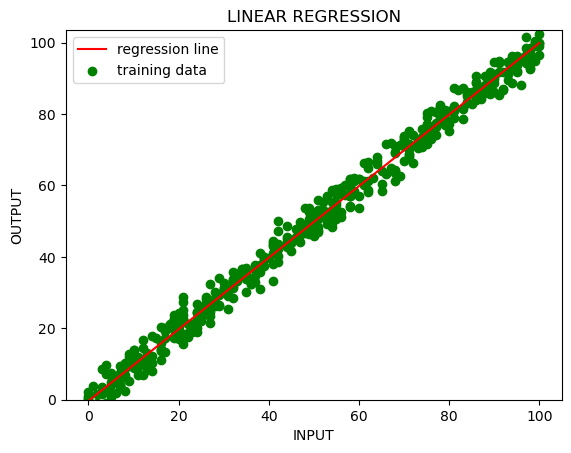

In [7]:
class LinearRegression:
    def __init__(self):
        self.parameters = {'m': None, 'c': None}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = predictions - train_output
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameter(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1
        self.loss = []
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='regression line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='training data')
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameter(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = animation.FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('Linear_Regression.gif', writer='ffmpeg')
        plt.xlabel('INPUT')
        plt.ylabel('OUTPUT')
        plt.title('LINEAR REGRESSION')
        plt.legend()
        plt.show()
        return self.parameters, self.loss

linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)